In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Information

In [8]:
data = pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
data.shape

(768, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Checking missing values and Data Cleaning

In [12]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# Through observing columns of datasets,many values '0' which does not make sense,thus indicates missing values
# Replacing the null values of columns with the mean respectively
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [19]:
# Round the column values to its appropriate decimals 
data.round({"Glucose":1, "BloodPressure":1, "SkinThickness":1, "Insulin":1, "BMI":1})

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0     79.8  33.6   
1              1     85.0           66.0           29.0     79.8  26.6   
2              8    183.0           64.0           20.5     79.8  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0     79.8  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           20.5     79.8  30.1   
767            1     93.0           70.0           31.0     79.8  30.4   

     DiabetesPedigreeFunction  Age  Outcome   BPLevel AgeGroup   InsulinLevel  
0                       0.627   50        1  NormalBP    Adult  NormalInsulin  
1                       0.351   31        0  NormalBP    Adult  NormalInsulin  
2                       0.672   32        1  NormalBP    Adult  NormalInsulin  
3                       0.167   21        0  NormalBP    Youth    HighInsulin  
4                       2.288   33        1     LowBP    Adult    HighInsulin  
..                        ...  ...      ...       ...      ...            ...  
763                     0.171   63        0  NormalBP   Senior    HighInsulin  
764                     0.340   27        0  NormalBP    Adult  NormalInsulin  
765                     0.245   30        0  NormalBP    Adult    HighInsulin  
766                     0.349   47        1     LowBP    Adult  NormalInsulin  
767                     0.315   23        0  NormalBP    Adult  NormalInsulin  

[768 rows x 12 columns]

# Wrangling variable into Levels

In [20]:
#1 Dividing the varibale "BloodPressure" into low, median and high levels
data.loc[(data.BloodPressure <= 60),  'BPLevel'] = 'LowBP'
data.loc[(data.BloodPressure > 60) & (data.BloodPressure < 120),  'BPLevel'] = 'NormalBP'
data.loc[(data.BloodPressure > 120),  'BPLevel'] = 'HighBP'

In [21]:
#2 Dividing the varibale "Age" into Youth, Adult and Senior levels
data.loc[(data.Age <= 21),  'AgeGroup'] = 'Youth'
data.loc[(data.Age > 21) & (data.Age < 60),  'AgeGroup'] = 'Adult'
data.loc[(data.Age > 60),  'AgeGroup'] = 'Senior'

In [22]:
#3 Dividing the varibale "Insulin" into LowInsulin, NormalInsulin and HighInsulin levels
data.loc[(data.Insulin <= 21),  'InsulinLevel'] = 'LowInsulin'
data.loc[(data.Insulin > 22) & (data.Insulin < 80),  'InsulinLevel'] = 'NormalInsulin'
data.loc[(data.Insulin > 80),  'InsulinLevel'] = 'HighInsulin'

In [23]:
data.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0             6    148.0      72.000000      35.000000   79.799479  33.600000   
1             1     85.0      66.000000      29.000000   79.799479  26.600000   
2             8    183.0      64.000000      20.536458   79.799479  23.300000   
3             1     89.0      66.000000      23.000000   94.000000  28.100000   
4             0    137.0      40.000000      35.000000  168.000000  43.100000   
5             5    116.0      74.000000      20.536458   79.799479  25.600000   
6             3     78.0      50.000000      32.000000   88.000000  31.000000   
7            10    115.0      69.105469      20.536458   79.799479  35.300000   
8             2    197.0      70.000000      45.000000  543.000000  30.500000   
9             8    125.0      96.000000      20.536458   79.799479  31.992578   
10            4    110.0      92.000000      20.536458   79.799479  37.600000   
11           10    168.0      74.000000      20.536458   79.799479  38.000000   
12           10    139.0      80.000000      20.536458   79.799479  27.100000   
13            1    189.0      60.000000      23.000000  846.000000  30.100000   
14            5    166.0      72.000000      19.000000  175.000000  25.800000   
15            7    100.0      69.105469      20.536458   79.799479  30.000000   
16            0    118.0      84.000000      47.000000  230.000000  45.800000   
17            7    107.0      74.000000      20.536458   79.799479  29.600000   
18            1    103.0      30.000000      38.000000   83.000000  43.300000   
19            1    115.0      70.000000      30.000000   96.000000  34.600000   

    DiabetesPedigreeFunction  Age  Outcome   BPLevel AgeGroup   InsulinLevel  
0                      0.627   50        1  NormalBP    Adult  NormalInsulin  
1                      0.351   31        0  NormalBP    Adult  NormalInsulin  
2                      0.672   32        1  NormalBP    Adult  NormalInsulin  
3                      0.167   21        0  NormalBP    Youth    HighInsulin  
4                      2.288   33        1     LowBP    Adult    HighInsulin  
5                      0.201   30        0  NormalBP    Adult  NormalInsulin  
6                      0.248   26        1     LowBP    Adult    HighInsulin  
7                      0.134   29        0  NormalBP    Adult  NormalInsulin  
8                      0.158   53        1  NormalBP    Adult    HighInsulin  
9                      0.232   54        1  NormalBP    Adult  NormalInsulin  
10                     0.191   30        0  NormalBP    Adult  NormalInsulin  
11                     0.537   34        1  NormalBP    Adult  NormalInsulin  
12                     1.441   57        0  NormalBP    Adult  NormalInsulin  
13                     0.398   59        1     LowBP    Adult    HighInsulin  
14                     0.587   51        1  NormalBP    Adult    HighInsulin  
15                     0.484   32        1  NormalBP    Adult  NormalInsulin  
16                     0.551   31        1  NormalBP    Adult    HighInsulin  
17                     0.254   31        1  NormalBP    Adult  NormalInsulin  
18                     0.183   33        0     LowBP    Adult    HighInsulin  
19                     0.529   32        1  NormalBP    Adult    HighInsulin

## Exploratory Data Analysis

## 1. Data Visualization

Text(0.5, 1.0, 'Correlation matrix of Diabetes Factors')

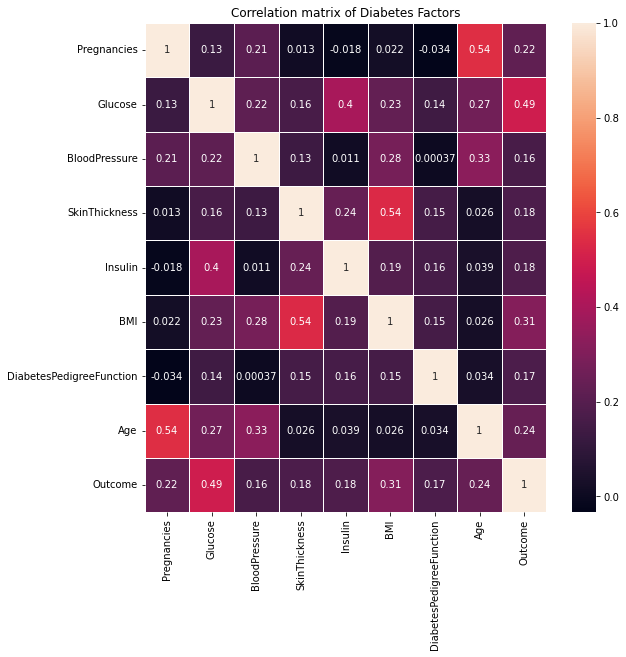

In [154]:
# Correlation Matrix on Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True,linewidth = 1)
plt.title('Correlation matrix of Diabetes Factors')

Text(0.5, 1.0, 'Boxplot distribution of Glucose between different outcomes')

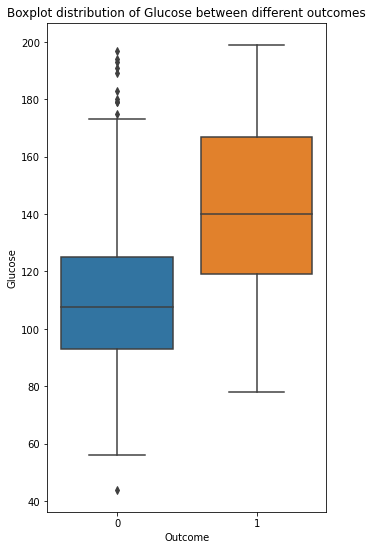

In [155]:
# Through observing the heatmap, we can see that the most correlated factor with outcome is 'Glucose'.
# Making a boxplot for Glucose within outcomes.
plt.figure(figsize=(5,9))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Boxplot distribution of Glucose between different outcomes')

Text(0.5, 1.0, 'Boxplot distribution of BMI between different outcomes')

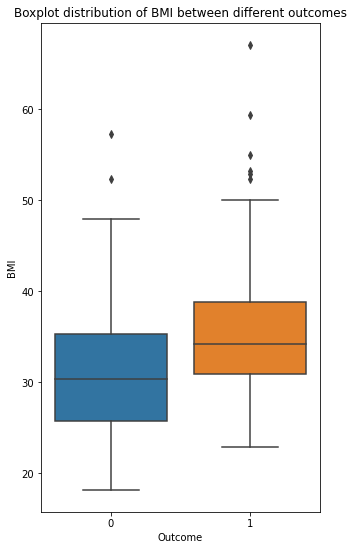

In [156]:
# Making a boxplot for BMI within outcomes.
plt.figure(figsize=(5,9))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('Boxplot distribution of BMI between different outcomes')

Text(0.5, 1.0, 'Boxplot distribution of Age between different outcomes')

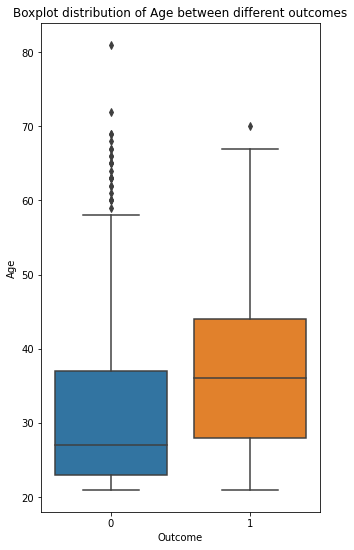

In [157]:
# Making a boxplot for Age within outcomes.
plt.figure(figsize=(5,9))
sns.boxplot(x='Outcome', y='Age', data=data)
plt.title('Boxplot distribution of Age between different outcomes')

Text(0.5, 1.0, 'Boxplot distribution of Pregnancies between different outcomes')

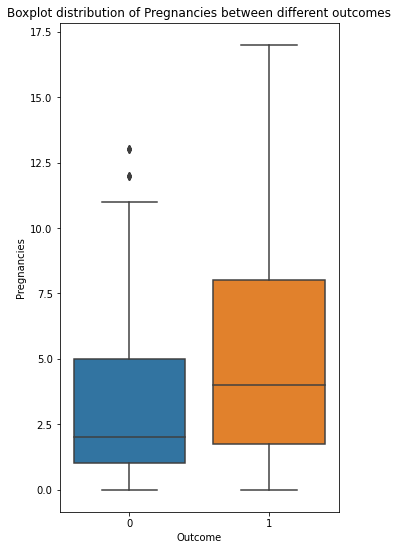

In [158]:
# Making a boxplot for Pregnancies within outcomes.
plt.figure(figsize=(5,9))
sns.boxplot(x='Outcome', y='Pregnancies', data=data)
plt.title('Boxplot distribution of Pregnancies between different outcomes')

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

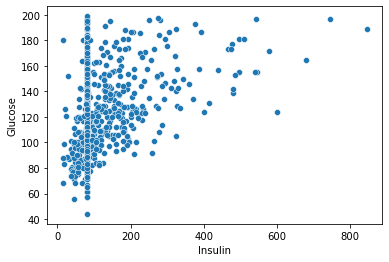

In [159]:
# Through observing the heatmap, there is strong correlation bewteen Insulin and Glucose
sns.scatterplot(x='Insulin', y='Glucose', data=data)

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

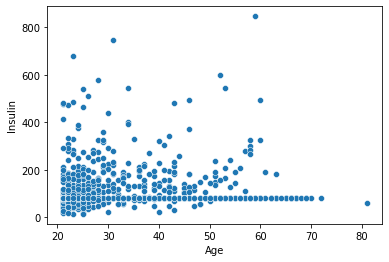

In [160]:
# Through observing the heatmap, there is also strong correlation bewteen Age and Glucose
sns.scatterplot(x='Age', y='Insulin', data=data)

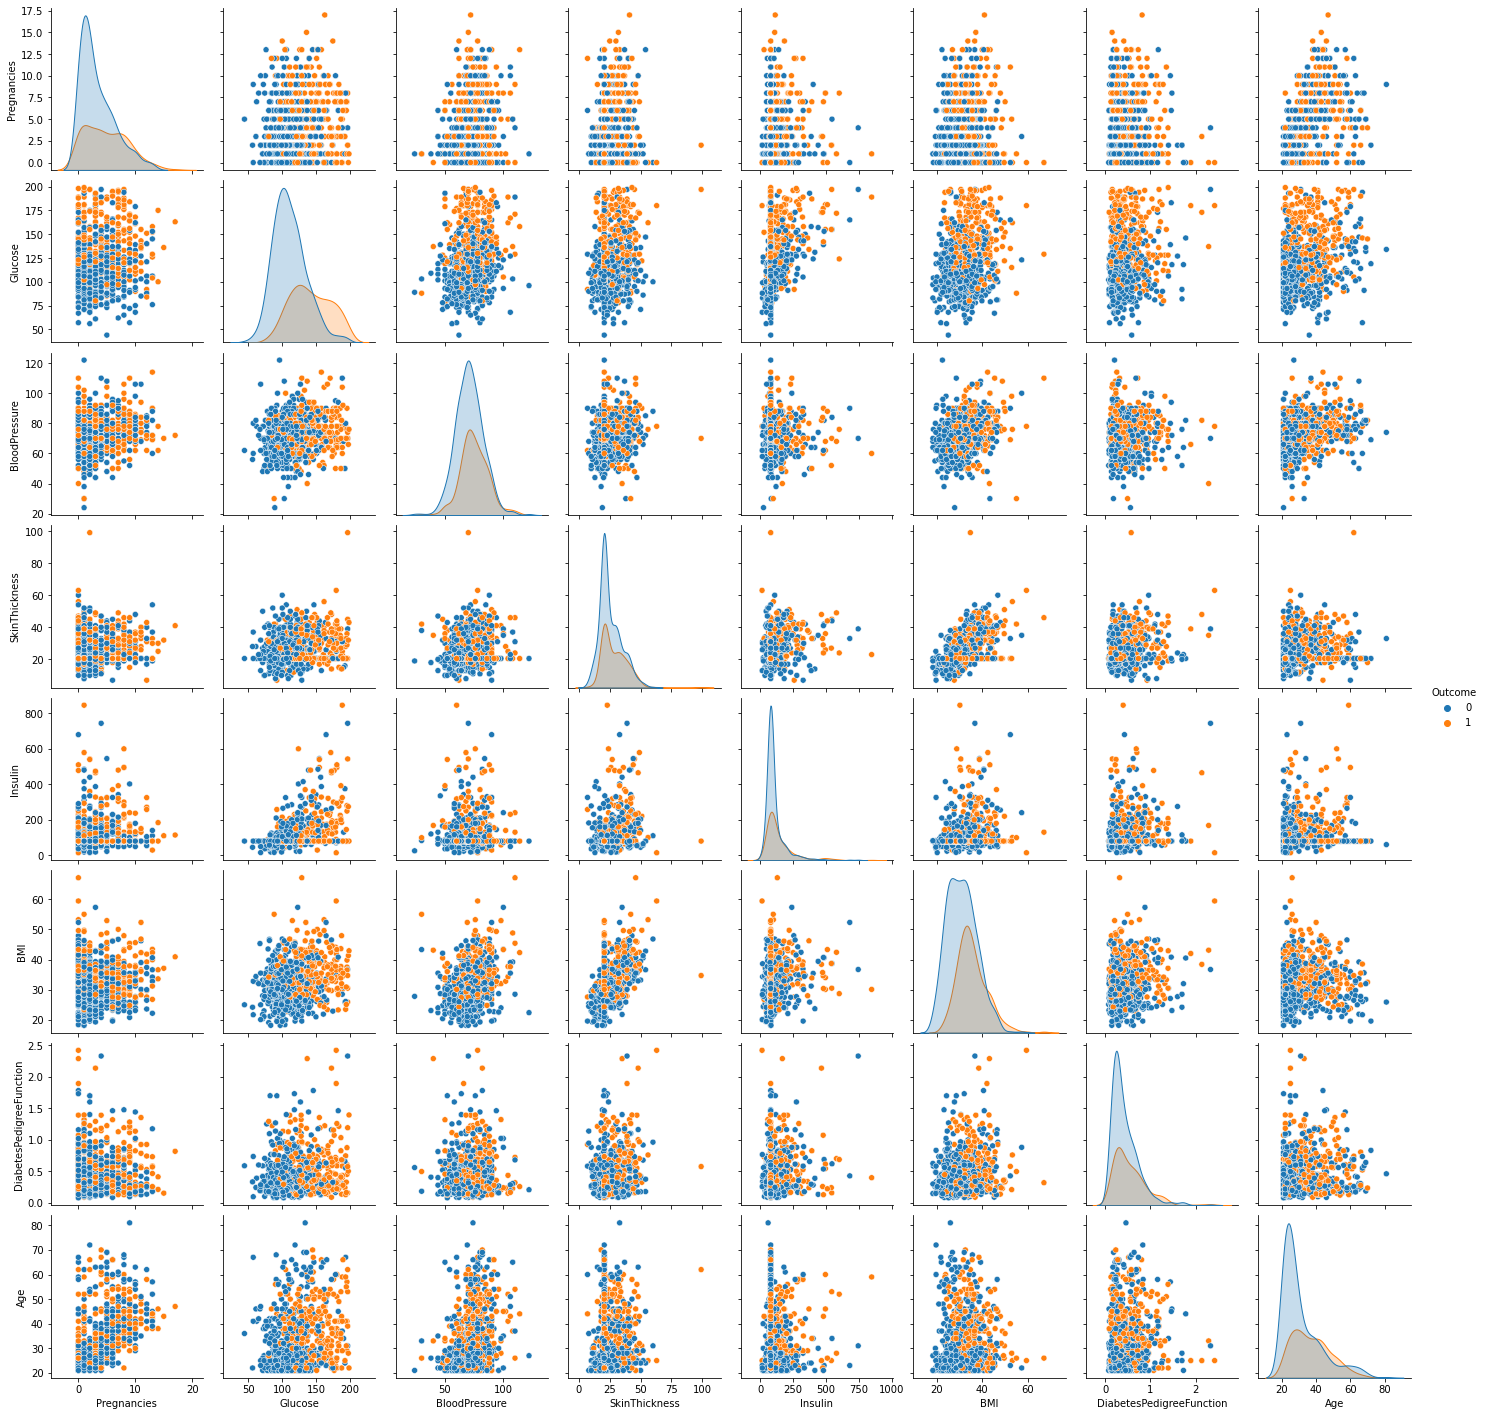

In [161]:
#More specially, I conduct a pairplot to specially explain the correlation between every two variables within different outcomes.
sns.pairplot(data, hue='Outcome')

## 2. Conducting Two Sample T-tests

##  (1) Glucose between Diabetes and NonDiabetes Group

In [61]:
# check whether the sample mean of Glucose between Diabetes group and Non-Diabetes group are the same.

# Subsetting the dataset
Glucose_Diabetes = data.loc[data['Outcome'] == 1]['Glucose']
Glucose_NonDiabetes = data.loc[data['Outcome'] == 0]['Glucose']

In [62]:
data.groupby('Outcome')['Glucose'].describe()

count        mean        std   min    25%    50%    75%    max
Outcome                                                                
0        500.0  110.705367  24.715021  44.0   93.0  107.5  125.0  197.0
1        268.0  142.159661  29.545943  78.0  119.0  140.0  167.0  199.0

In [63]:
# Checking the Normality of Data
import scipy
from scipy import stats
stats.shapiro(Glucose_Diabetes)

ShapiroResult(statistic=0.9739663004875183, pvalue=8.275739673990756e-05)

In [64]:
stats.shapiro(Glucose_NonDiabetes)

ShapiroResult(statistic=0.9751130938529968, pvalue=1.6293320470595063e-07)

In [65]:
# Checking the Variances Equity Assumption
stats.levene(Glucose_Diabetes, Glucose_NonDiabetes)

LeveneResult(statistic=23.61915456579704, pvalue=1.424585292938956e-06)

In [68]:
# Conducting T-test
#!pip install pingouin
import pingouin as pg

res = pg.ttest(Glucose_Diabetes, Glucose_NonDiabetes, correction=False)
display(res)

T  dof alternative         p-val           CI95%   cohen-d  \
T-test  15.67909  766   two-sided  2.937418e-48  [27.52, 35.39]  1.186995   

            BF10  power  
T-test  5.13e+44    1.0

##  (2) Age between Diabetes and NonDiabetes Group

In [75]:
# check whether the sample mean of Age between Diabetes group and Non-Diabetes group are the same.

# Subsetting the dataset
Age_Diabetes = data.loc[data['Outcome'] == 1]['Age']
Age_NonDiabetes = data.loc[data['Outcome'] == 0]['Age']

In [76]:
# Checking the Normality of Data
stats.shapiro(Age_Diabetes)

ShapiroResult(statistic=0.9545705914497375, pvalue=2.0275294332350313e-07)

In [77]:
stats.shapiro(Age_NonDiabetes)

ShapiroResult(statistic=0.8011691570281982, pvalue=2.6708481417438164e-24)

In [78]:
# Conducting T-test
res = pg.ttest(Age_Diabetes, Age_NonDiabetes, correction=False)
display(res)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  6.792688  766   two-sided  2.209975e-11  [4.18, 7.58]  0.514245   

             BF10  power  
T-test  3.091e+08    1.0

##  (3) BMI between Diabetes and NonDiabetes Group

In [83]:
# check whether the sample mean of BMI between Diabetes group and Non-Diabetes group are the same.

# Subsetting the dataset
BMI_Diabetes = data.loc[data['Outcome'] == 1]['BMI']
BMI_NonDiabetes = data.loc[data['Outcome'] == 0]['BMI']

In [84]:
# Checking the Normality of Data
stats.shapiro(BMI_Diabetes)

ShapiroResult(statistic=0.9482877850532532, pvalue=3.9639893145704264e-08)

In [85]:
stats.shapiro(BMI_NonDiabetes)

ShapiroResult(statistic=0.981835663318634, pvalue=6.778502211091109e-06)

In [86]:
# Conducting T-test
res = pg.ttest(BMI_Diabetes, BMI_NonDiabetes, correction=False)
display(res)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  9.09703  766   two-sided  7.868368e-19  [3.53, 5.47]  0.688696   

             BF10  power  
T-test  5.379e+15    1.0

##  (4) Insulin between Diabetes and NonDiabetes Group

In [95]:
# check whether the sample mean of Insulin between Diabetes group and Non-Diabetes group are the same.

# Subsetting the dataset
Insulin_Diabetes = data.loc[data['Outcome'] == 1]['Insulin']
Insulin_NonDiabetes = data.loc[data['Outcome'] == 0]['Insulin']

In [96]:
# Checking the Normality of Data
stats.shapiro(Insulin_Diabetes)

ShapiroResult(statistic=0.6492561101913452, pvalue=3.864055599483098e-23)

In [97]:
stats.shapiro(Insulin_NonDiabetes)

ShapiroResult(statistic=0.5908485651016235, pvalue=1.2418101584975146e-32)

In [98]:
# Conducting T-test
res = pg.ttest(Insulin_Diabetes, Insulin_NonDiabetes, correction=False)
display(res)

T  dof alternative         p-val           CI95%  cohen-d  \
T-test  5.040842  766   two-sided  5.788430e-07  [21.35, 48.59]  0.38162   

           BF10     power  
T-test  1.8e+04  0.998946

## Multiple Linear Regression

In [180]:
!pip install scikit_posthocs
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [181]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('Glucose ~ Pregnancies+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age+Outcome', data=data).fit()

In [182]:
# print summary of linear regression
(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     58.03
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.12e-73
Time:                        01:08:31   Log-Likelihood:                -3529.2
No. Observations:                 768   AIC:                             7076.
Df Residuals:                     759   BIC:                             7118.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   66.8167      6.270     10.657      0.000      54.508      79.125
Pregnancies                 -0.5587      0.312     -1.793      0.073      -1.170       0.053
BloodPressure                0.2747      0.080      3.448      0.001       0.118       0.431
SkinThickness               -0.0487      0.109     -0.447      0.655      -0.262       0.165
Insulin                      0.1034      0.010     10.526      0.000       0.084       0.123
BMI                          0.1037      0.161      0.643      0.520      -0.213       0.420
DiabetesPedigreeFunction     1.0250      2.718      0.377      0.706      -4.311       6.361
Age                          0.4124      0.093      4.450      0.000       0.230       0.594
Outcome                     24.7351      2.027     12.203      0.000      20.756      28.714
==============================================================================
Omnibus:                       17.310   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.904
Skew:                           0.353   Prob(JB):                     0.000129
Kurtosis:                       3.246   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ANOVA

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#!pip install bioinfokit
from bioinfokit.analys import stat

In [198]:
# ANOVA for levels of BloodPressure Levels
res = stat()
res.anova_stat(df=data,res_var='Glucose',anova_model='Glucose ~ C(BPLevel)')
res.anova_summary    

df         sum_sq      mean_sq         F    PR(>F)
C(BPLevel)    2.0   15502.277185  7751.138593  8.531719  0.000216
Residual    765.0  695008.976842   908.508466       NaN       NaN

In [200]:
# ANOVA for levels of Age Levels
res = stat()
res.anova_stat(df=data,res_var='Glucose',anova_model='Glucose ~ C(AgeGroup)')
res.anova_summary    

df         sum_sq      mean_sq         F    PR(>F)
C(AgeGroup)    2.0   14409.611421  7204.805711  7.948268  0.000383
Residual     760.0  688911.427726   906.462405       NaN       NaN

In [201]:
# ANOVA for levels of Insulin Levels
res = stat()
res.anova_stat(df=data,res_var='Glucose',anova_model='Glucose ~ C(InsulinLevel)')
res.anova_summary  

df         sum_sq       mean_sq          F        PR(>F)
C(InsulinLevel)    2.0   46521.702633  23260.851316  26.765165  5.823486e-12
Residual         764.0  663970.878546    869.071831        NaN           NaN

## Post Hoc Test

In [188]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [189]:
#tukey hsd for BloodPressure Level vercus GLucose
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var='BPLevel', anova_model='Glucose ~ C(BPLevel)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1  group2       Diff      Lower      Upper   q-value   p-value
0  NormalBP   LowBP  11.809885   4.851359  18.768411  5.636499  0.001000
1  NormalBP  HighBP  27.459434 -43.267091  98.185958  1.289408  0.622216
2     LowBP  HighBP  15.649549 -55.308399  86.607497  0.732457  0.847530

In [202]:
#tukey hsd for Age Level vercus GLucose
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var='AgeGroup', anova_model='Glucose ~ C(AgeGroup)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1  group2       Diff      Lower      Upper   q-value   p-value
0  Adult   Youth  11.722773   2.400718  21.044827  4.176389  0.009088
1  Adult  Senior  14.781547   0.894978  28.668116  3.535144  0.033775
2  Youth  Senior  26.504320  10.230407  42.778232  5.408874  0.001000

In [203]:
#tukey hsd for Outcome vercus GLucose
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var='Outcome', anova_model='Glucose ~ C(Outcome)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1  group2       Diff      Lower     Upper    q-value  p-value
0       1       0  31.540925  27.597281  35.48457  22.204039    0.001

In [204]:
#tukey hsd for Insulin Level vercus GLucose
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var='InsulinLevel', anova_model='Glucose ~ C(InsulinLevel)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1       group2       Diff      Lower      Upper    q-value  \
0  NormalInsulin  HighInsulin  15.812301  10.635863  20.988740  10.144864   
1  NormalInsulin   LowInsulin  12.037176 -19.028863  43.103215   1.286829   
2    HighInsulin   LowInsulin  27.849477  -3.320643  59.019598   2.967295   

    p-value  
0  0.001000  
1  0.623259  
2  0.090835

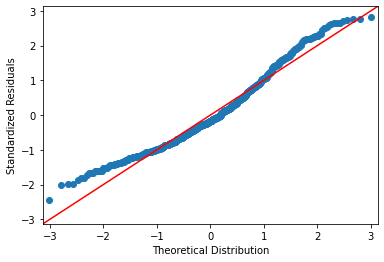

In [205]:
#testing for normality
sm.qqplot(res.anova_std_residuals,line='45')
plt.xlabel("Theoretical Distribution")
plt.ylabel("Standardized Residuals")
plt.show()

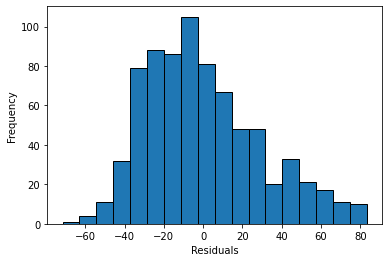

In [206]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()